In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

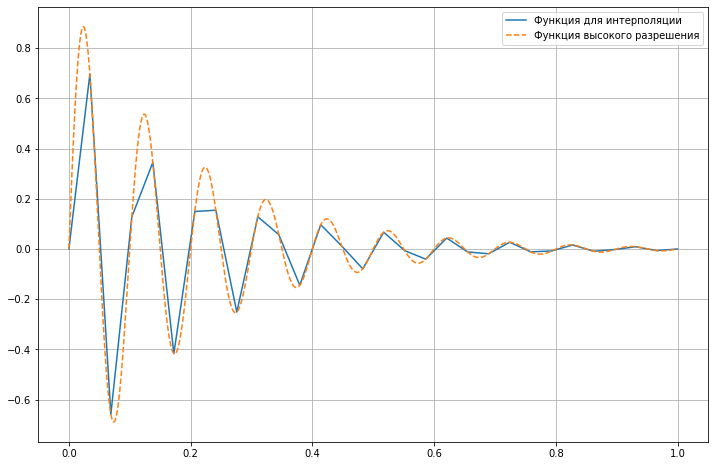

In [2]:
w1 = 10    
a1 = 1     
Fs = 30 
Ts = 1.0/Fs
alpha = 5

## исходная ось (низкое разрешение)
t = np.linspace(0, 1, Fs)
## функция для интерполяции
y = a1*np.exp(-alpha*t) * np.sin(2*np.pi*w1*t) 
 

## интерполяционная сетка (высокое разрешение)
tt = np.linspace(0, 1, 100*Fs)
## функция высокого разрешения (пытаемся получить её интерполяцией)
y_high_res = a1*np.exp(-alpha*tt) * np.sin(2*np.pi*w1*tt) 

f, ax = plt.subplots(figsize=(12, 8))
ax.plot(t, y)
ax.plot(tt, y_high_res, '--')
ax.legend(['Функция для интерполяции', 'Функция высокого разрешения'])
ax.grid()
plt.show()

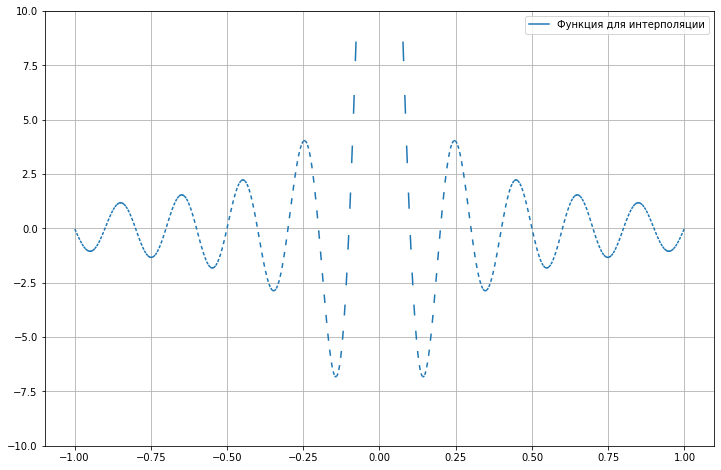

,t,y,y_lost
0,-1.000000,-1.224647e-15,NaN
1,-0.997998,-6.297937e-02,-0.062979
2,-0.995996,-1.259624e-01,-0.125962
3,-0.993994,-1.887000e-01,NaN
4,-0.991992,-2.509431e-01,-0.250943
5,-0.989990,-3.124436e-01,-0.312444
6,-0.987988,-3.729553e-01,NaN
7,-0.985986,-4.322350e-01,-0.432235
8,-0.983984,-4.900431e-01,-0.490043
9,-0.981982,-5.461451e-01,NaN


In [4]:
w1 = 5   
a1 = 1     
Fs = 1000
Ts = 1.0/Fs
alpha = 5

df = pd.DataFrame()
## ось
df['t'] = np.linspace(-1, 1, Fs)
## функция для интерполяции
df['y'] = np.sin(2*np.pi*w1*df.t) / df.t 
 
## пропущенные значения    
df['y_lost'] = df.y
df.loc[0::3, 'y_lost'] = np.nan


f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y_lost)
ax.set_ylim([-10, 10])
ax.legend(['Функция для интерполяции'])
ax.grid()
plt.show()

df.head(10)